### Hyperparam cross-validation

[PosixPath('/home/terra/Projects/vis-desc/modules/lab/data/metrics/encoder/hist2/finetuned-mbert_trial_2_fold_0.json'), PosixPath('/home/terra/Projects/vis-desc/modules/lab/data/metrics/encoder/hist2/finetuned-mbert_trial_6_fold_0.json'), PosixPath('/home/terra/Projects/vis-desc/modules/lab/data/metrics/encoder/hist2/finetuned-mbert_trial_1_fold_1.json'), PosixPath('/home/terra/Projects/vis-desc/modules/lab/data/metrics/encoder/hist2/finetuned-mbert_trial_4_fold_2.json'), PosixPath('/home/terra/Projects/vis-desc/modules/lab/data/metrics/encoder/hist2/finetuned-mbert_trial_6_fold_2.json'), PosixPath('/home/terra/Projects/vis-desc/modules/lab/data/metrics/encoder/hist2/finetuned-mbert_trial_5_fold_4.json'), PosixPath('/home/terra/Projects/vis-desc/modules/lab/data/metrics/encoder/hist2/finetuned-mbert_trial_0_fold_1.json'), PosixPath('/home/terra/Projects/vis-desc/modules/lab/data/metrics/encoder/hist2/finetuned-mbert_trial_3_fold_0.json'), PosixPath('/home/terra/Projects/vis-desc/module

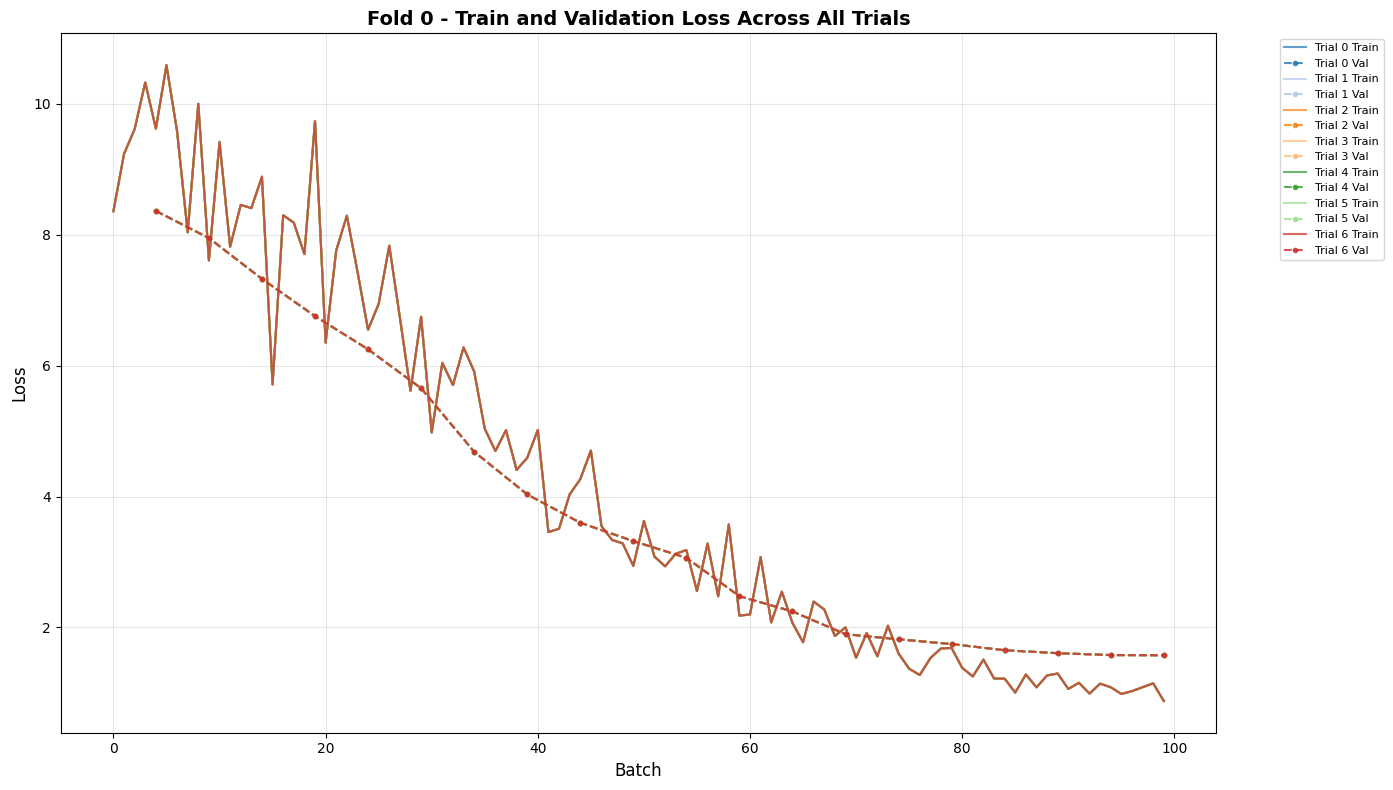

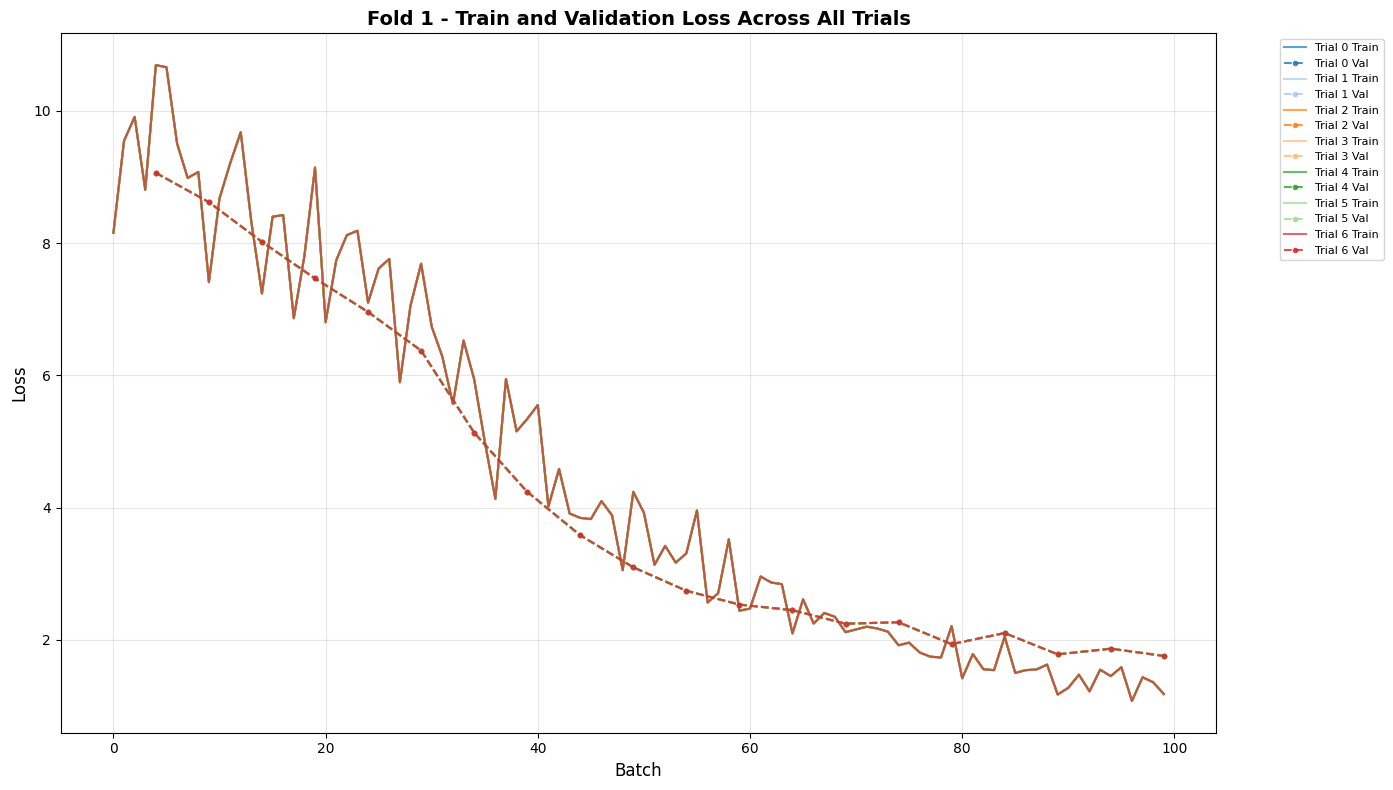

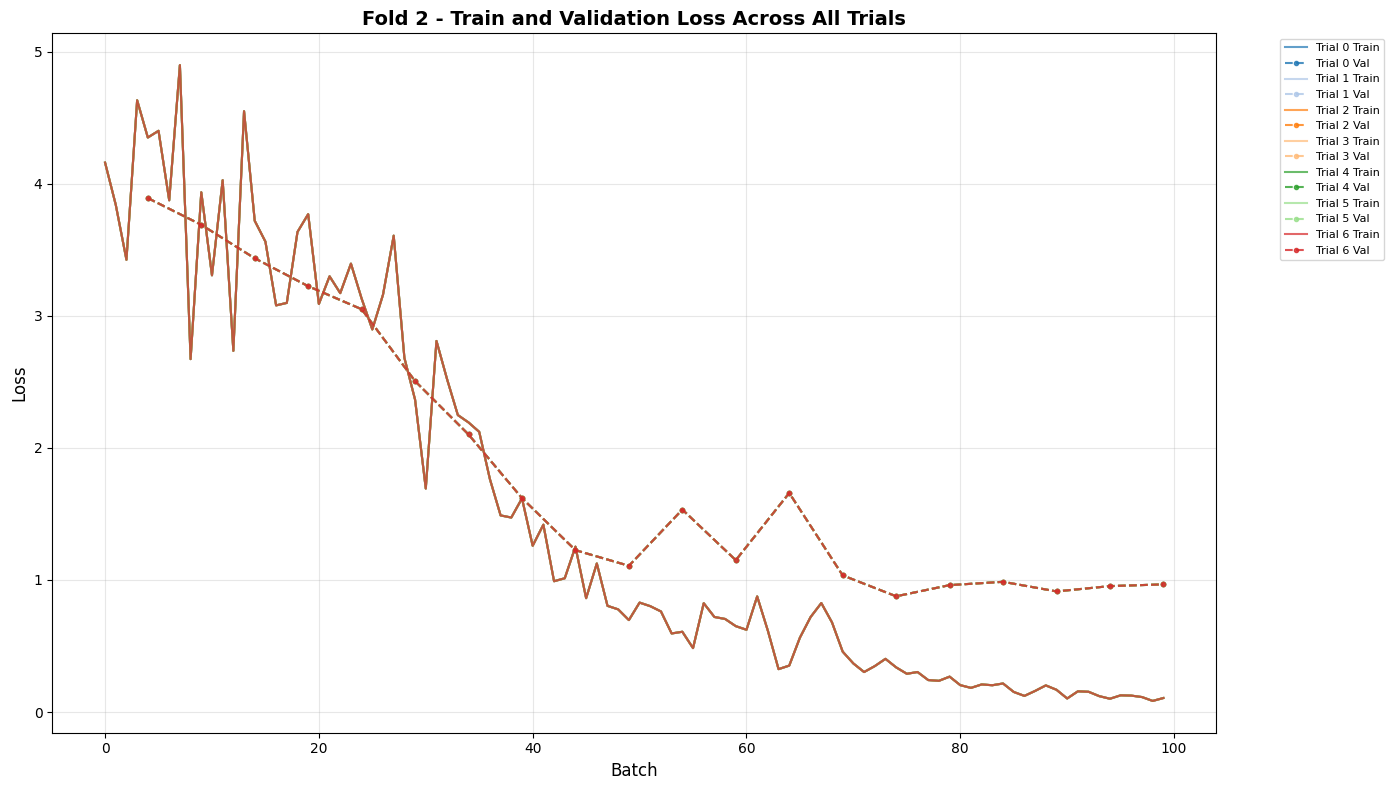

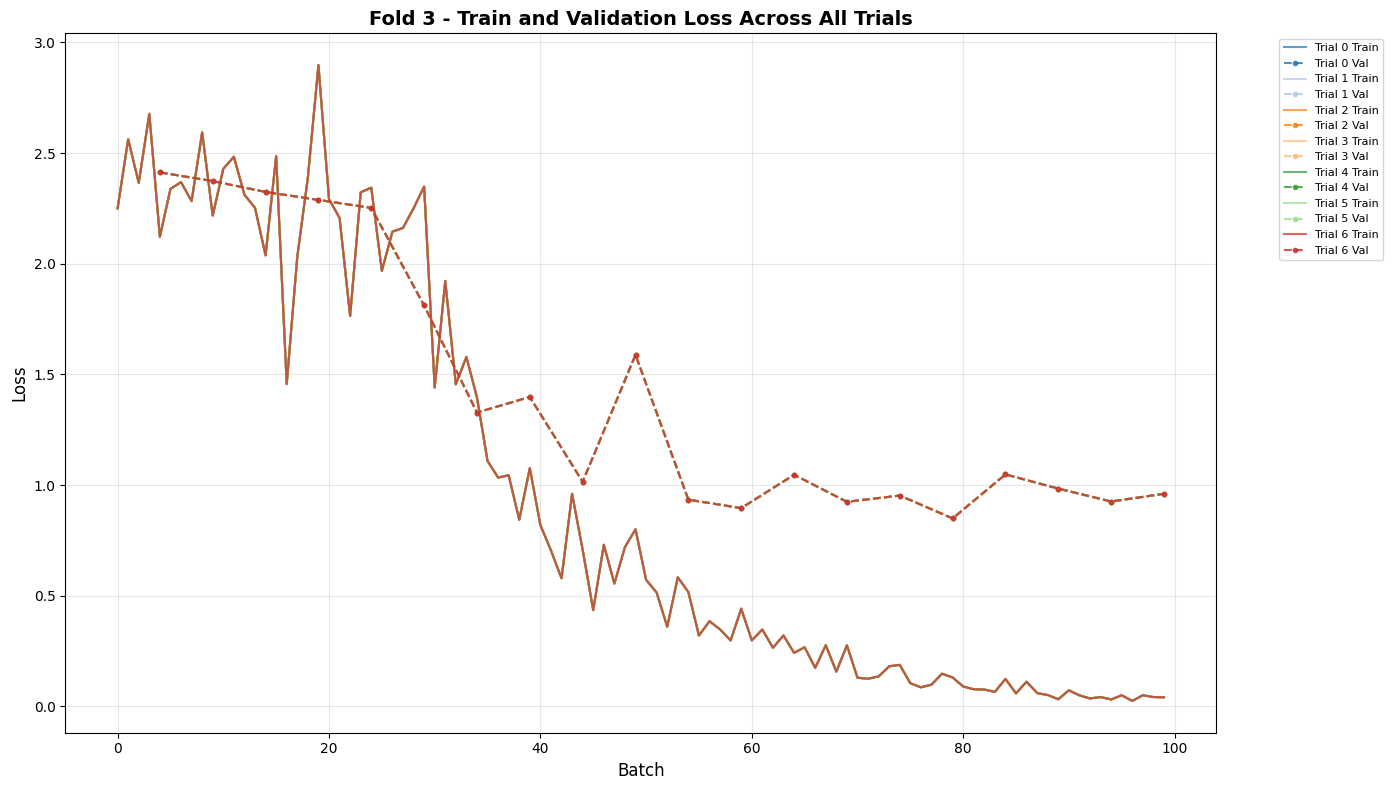

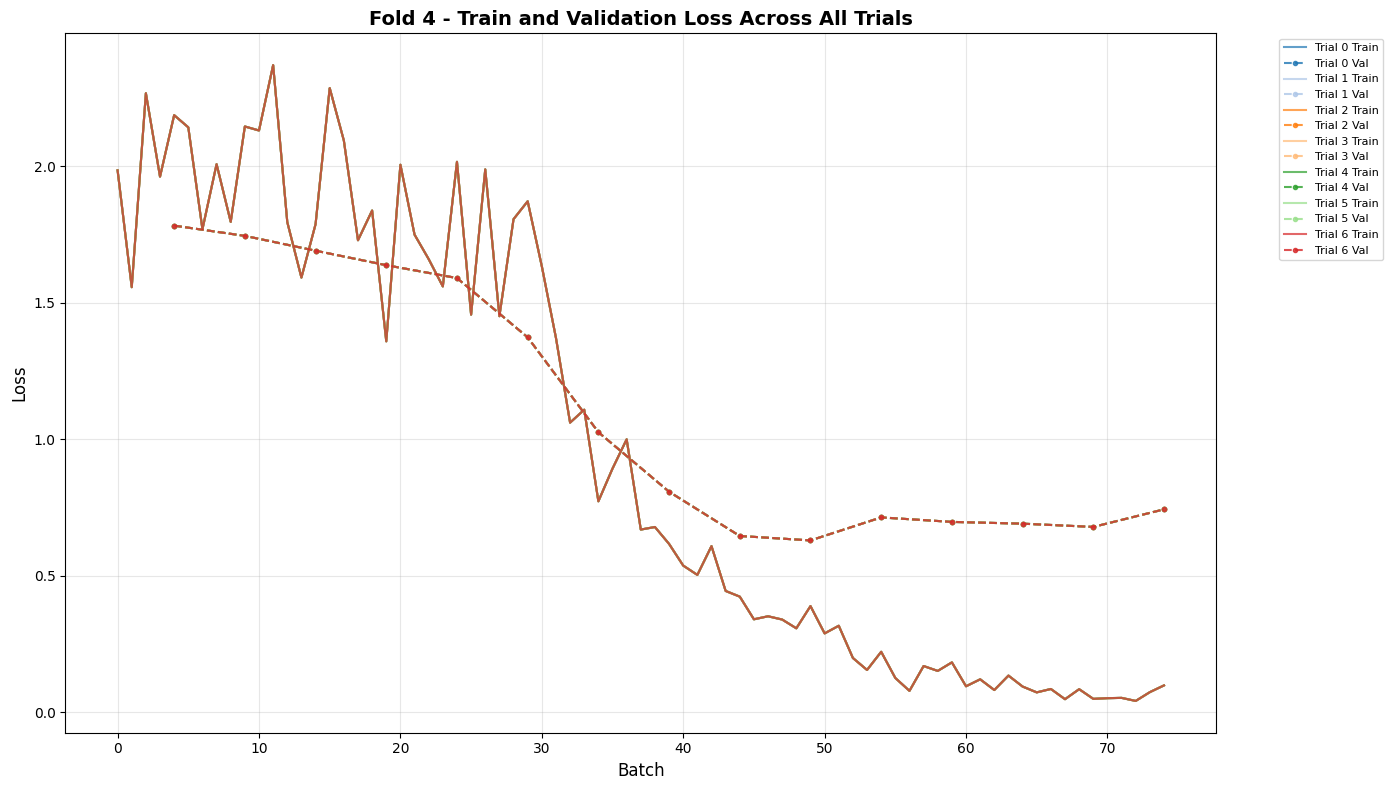

In [6]:
from collections import defaultdict
import matplotlib.cm as cm
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

sys.path.append(str(Path.cwd().parent.parent))
from utils import DATA_DIR

# Path to the finetuned metrics
finetuned_dir = DATA_DIR / "metrics" / "encoder" / "hist2"

# Find all trial fold files
trial_files = list(finetuned_dir.glob("finetuned-mbert_trial_*_fold_*.json"))
print(trial_files)

# Group by fold
fold_data = defaultdict(list)
for file in trial_files:
    # Parse trial and fold from filename
    # filename like finetuned-mbert_trial_18_fold_1.json
    parts = file.stem.split("_")
    trial = int(parts[2])
    fold = int(parts[4])
    fold_data[fold].append((trial, file))

# Now, for each fold, plot
for fold_num in sorted(fold_data.keys()):
    fig, ax = plt.subplots(figsize=(14, 8))

    # Use tab20 for 20 trials
    colors = cm.tab20(np.linspace(0, 1, 20))

    for trial, file in sorted(fold_data[fold_num]):
        with open(file, "r") as f:
            data = json.load(f)

        train_history = data["train_loss_history"]
        val_history = data["val_loss_history"]

        train_epochs = [x[0] for x in train_history]
        train_losses = [x[1] for x in train_history]

        val_epochs = [x[0] for x in val_history]
        val_losses = [x[1] for x in val_history]

        # Check if any loss >= 8000
        all_losses = train_losses + val_losses
        if max(all_losses) >= 8000:
            print(f"Trial {trial} removed due to high loss (>=8000)")
            continue

        color = colors[trial % 20]

        ax.plot(
            train_epochs,
            train_losses,
            "-",
            color=color,
            alpha=0.7,
            linewidth=1.5,
            label=f"Trial {trial} Train",
        )
        ax.plot(
            val_epochs,
            val_losses,
            "--o",
            color=color,
            markersize=3,
            alpha=0.8,
            label=f"Trial {trial} Val",
        )

    ax.set_xlabel("Batch", fontsize=12)
    ax.set_ylabel("Loss", fontsize=12)
    ax.set_title(
        f"Fold {fold_num} - Train and Validation Loss Across All Trials",
        fontsize=14,
        fontweight="bold",
    )
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()